In [1]:
import tensorflow as tf
import numpy as np
import mlp.tf_utils as utils
from mlp.data_providers import AugmentedCIFAR10DataProvider, AugmentedCIFAR100DataProvider, CIFAR100DataProvider, CIFAR10DataProvider
from mlp.image_transforms import random_flip, random_crop, center_crop, random_flip_small
from mlp.Conv_models import ConvModel, TwoTaskConvModel, TwoTaskConvModelSoftSharing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 12345 
rng = np.random.RandomState(seed)

In [2]:
#### event file dirs #####

train_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/train/events.out.tfevents.1498489049.ben-desktop"
valid_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/valid/events.out.tfevents.1498489049.ben-desktop"

train_2 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/MTL_CIFAR_100_and_10/2017-06-26_14-10-54/train/events.out.tfevents.1498482654.ben-desktop"
valid_2 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/MTL_CIFAR_100_and_10/2017-06-26_14-10-54/valid/events.out.tfevents.1498482655.ben-desktop"
other_2 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/MTL_CIFAR_100_and_10/2017-06-26_14-10-54/other/events.out.tfevents.1498482655.ben-desktop"

train_3 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/MTL_CIFAR_100_and_20/2017-06-26_15-04-28/train/events.out.tfevents.1498485868.ben-desktop"
valid_3 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/MTL_CIFAR_100_and_20/2017-06-26_15-04-28/valid/events.out.tfevents.1498485869.ben-desktop"
other_3 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/MTL_CIFAR_100_and_20/2017-06-26_15-04-28/other/events.out.tfevents.1498485869.ben-desktop"

In [22]:
print("############# train_1 ###########")
print("")
print("")
train_1_stats = utils.event_file_to_stats_dict(train_1)
print("ACCURACIES")
train_1_acc = utils.only_stats_with_keyword(train_1_stats, "accuracy")
print(train_1_acc.keys())
print("")
print("ERRORS")
train_1_error = utils.only_stats_with_keyword(train_1_stats, "error")
print(train_1_error.keys())
print("")
print("")

print("####### valid_1 ##########")
print("")
print("")
valid_1_stats = utils.event_file_to_stats_dict(valid_1)
print("ACCURACIES")
valid_1_acc = utils.only_stats_with_keyword(valid_1_stats, "accuracy")
print(valid_1_acc.keys())
print("")
print("ERRORS")
valid_1_error = utils.only_stats_with_keyword(valid_1_stats, "error")
print(valid_1_error.keys())
print("")
print("")

print("####### train_2 ##########")
print("")
print("")
train_2_stats = utils.event_file_to_stats_dict(train_2)
print("ACCURACIES")
train_2_acc = utils.only_stats_with_keyword(train_2_stats, "accuracy")
print(train_2_acc.keys())
print("")
print("ERRORS")
train_2_error = utils.only_stats_with_keyword(train_2_stats, "error")
print(train_2_error.keys())
print("")
print("")

print("####### valid_2 ##########")
print("")
print("")
valid_2_stats = utils.event_file_to_stats_dict(valid_2)
print("ACCURACIES")
valid_2_acc = utils.only_stats_with_keyword(valid_2_stats, "accuracy")
print(valid_2_acc.keys())
print("")
print("ERRORS")
valid_2_error = utils.only_stats_with_keyword(valid_2_stats, "error")
print(valid_2_error.keys())
print("")
print("")


print("########## other_2 ##############")
print("")
print("")
other_2_stats = utils.event_file_to_stats_dict(other_2)
print("WEIGHTS DIFF")
other_2_diff = utils.only_stats_with_keyword(other_2_stats, "diff")
print(other_2_diff.keys())
print("")
print("")

print("####### train_3 ##########")
print("")
print("")
train_3_stats = utils.event_file_to_stats_dict(train_3)
print("ACCURACIES")
train_3_acc = utils.only_stats_with_keyword(train_3_stats, "accuracy")
print(train_3_acc.keys())
print("")
print("ERRORS")
train_3_error = utils.only_stats_with_keyword(train_3_stats, "error")
print(train_3_error.keys())
print("")
print("")

print("####### valid_3 ##########")
print("")
print("")
valid_3_stats = utils.event_file_to_stats_dict(valid_3)
print("ACCURACIES")
valid_3_acc = utils.only_stats_with_keyword(valid_3_stats, "accuracy")
print(valid_3_acc.keys())
print("")
print("ERRORS")
valid_3_error = utils.only_stats_with_keyword(valid_3_stats, "error")
print(valid_3_error.keys())
print("")
print("")

print("########## other_3 ##############")
print("")
print("")
other_3_stats = utils.event_file_to_stats_dict(other_3)
print("WEIGHTS DIFF")
other_3_diff = utils.only_stats_with_keyword(other_3_stats, "diff")
print(other_3_diff.keys())
print("")
print("")

############# train_1 ###########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### valid_1 ##########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### train_2 ##########


ACCURACIES
['MTL_CIFAR_100_and_10_aux_accuracy', 'MTL_CIFAR_100_and_10_main_accuracy']

ERRORS
['MTL_CIFAR_100_and_10_aux_error', 'MTL_CIFAR_100_and_10_main_error']


####### valid_2 ##########


ACCURACIES
['MTL_CIFAR_100_and_10_aux_accuracy', 'MTL_CIFAR_100_and_10_main_accuracy']

ERRORS
['MTL_CIFAR_100_and_10_aux_error', 'MTL_CIFAR_100_and_10_main_error']


########## other_2 ##############


WEIGHTS DIFF
['mainshared_weights_diff']


####### train_3 ##########


ACCURAC

In [4]:
smooth_distance = 10
alpha = 0.2
line_width = 3.0
size=38

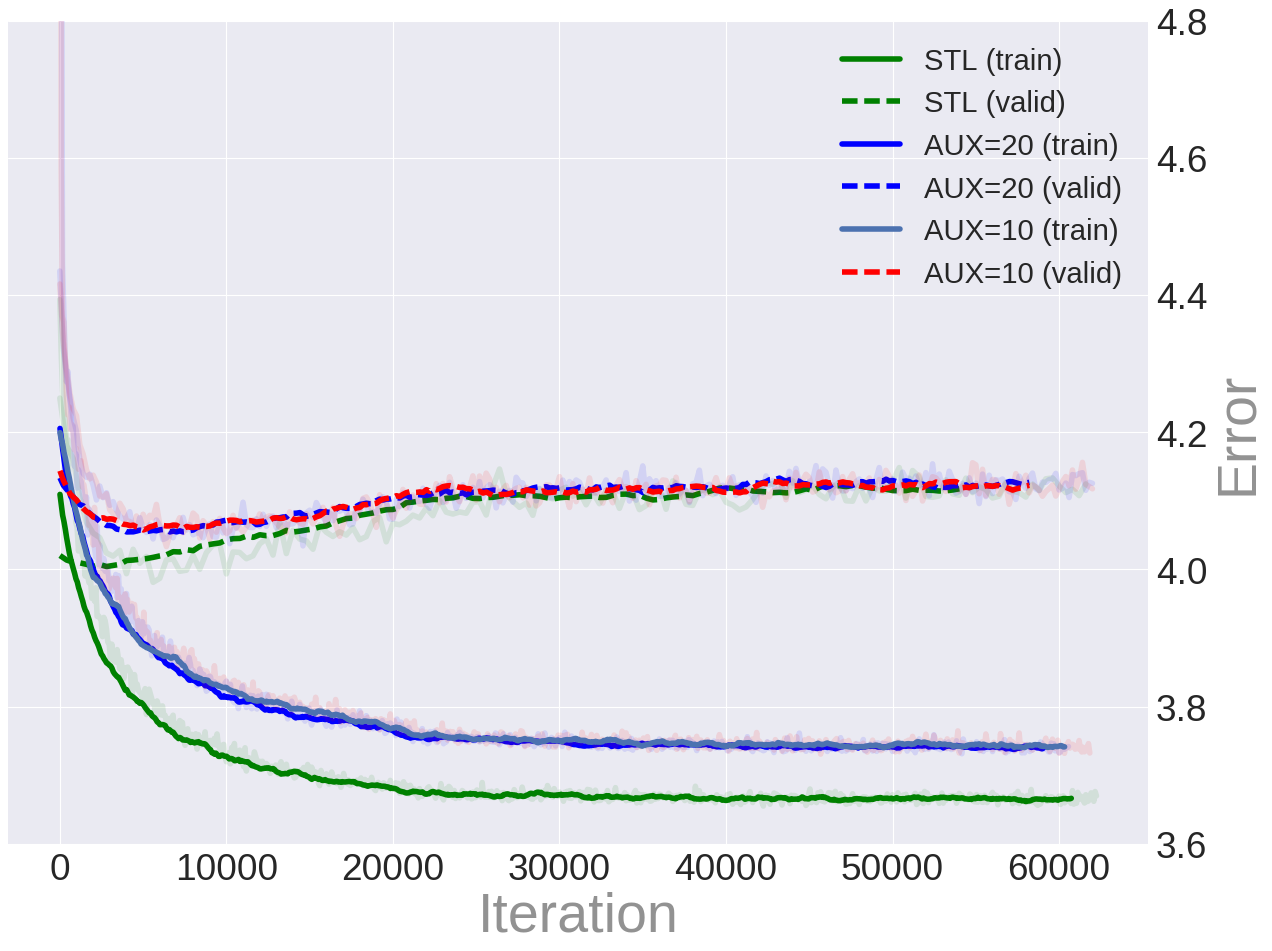

In [64]:
smooth_distance = 10
alpha = 0.1
line_width = 5.0
size=50

fig = plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline CIFAR 100 ################
lbl = "STL"

y = np.array(train_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(train_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl + " (train)", linewidth=line_width, color='g')

y = np.array(valid_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([20 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(valid_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([20 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, '--', label=lbl+ " (valid)", linewidth=line_width, color='g')


############# MTL aux 20 #################
lbl = "AUX=20"

y = np.array(train_3_error["MTL_CIFAR_100_and_20_main_error"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(train_3_error["MTL_CIFAR_100_and_20_main_error"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl + " (train)", linewidth=line_width, color='b')

y = np.array(valid_3_error["MTL_CIFAR_100_and_20_main_error"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(valid_3_error["MTL_CIFAR_100_and_20_main_error"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, '--', label=lbl + " (valid)", linewidth=line_width, color='b')


############# MTL aux 10 #################
lbl = "AUX=10"

y = np.array(train_2_error["MTL_CIFAR_100_and_10_main_error"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(train_2_error["MTL_CIFAR_100_and_10_main_error"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl + " (train)", linewidth=line_width)

y = np.array(valid_2_error["MTL_CIFAR_100_and_10_main_error"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(valid_2_error["MTL_CIFAR_100_and_10_main_error"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, '--', label=lbl + " (valid)", linewidth=line_width, color='r')

plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
plt.axis(ymax=4.8, ymin=3.6)
#plt.ylabel("Error", size=size, alpha=0.5)
ax = plt.gca()
ax.set_ylabel("Error", size=size, alpha=0.5)
ax.yaxis.set_label_position("right")
plt.legend(loc="best",prop={'size':size/1.9})
plt.tight_layout()
plt.savefig("error_10_vs_20.png", dpi=100)
plt.show()

In [6]:
print("STL:\t{}".format(min(valid_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])))
print("1:\t{}".format(min(valid_2_error['MTL_CIFAR_100_and_10_main_error'])))
print("2:\t{}".format(min(valid_3_error['MTL_CIFAR_100_and_20_main_error'])))

STL:	3.98109173775
1:	4.03318834305
2:	4.0341835022


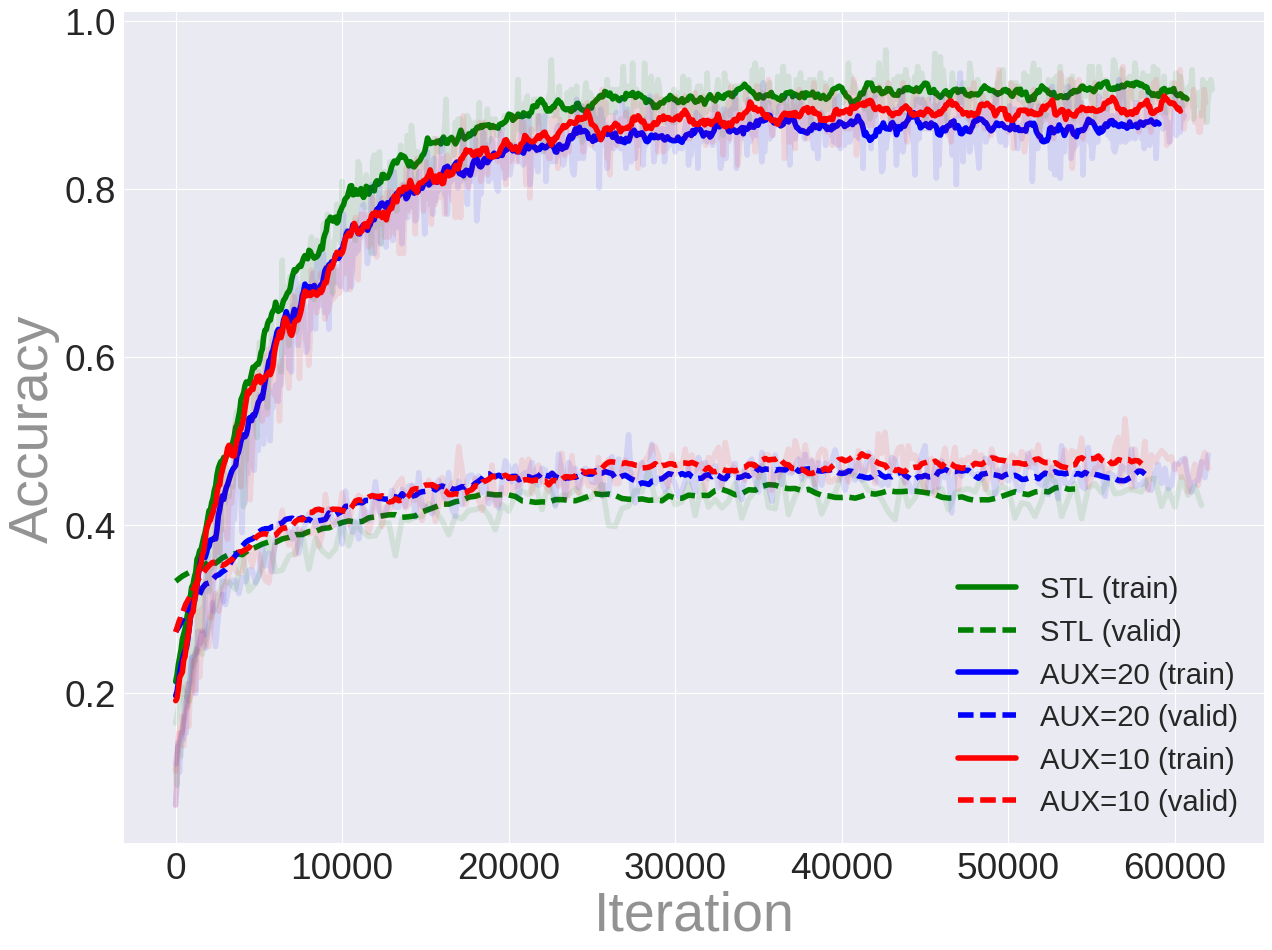

In [66]:
smooth_distance = 10
alpha = 0.1
line_width = 5.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("", size=size)
plt.ylabel("Accuracy", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline CIFAR 100 ################
lbl = "STL"

y = np.array(train_1_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(train_1_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl + " (train)", linewidth=line_width, color='g')

y = np.array(valid_1_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([20 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='g')

y = np.array(valid_1_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([20 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, '--', label=lbl+ " (valid)", linewidth=line_width, color='g')


############# MTL aux 20 #################
lbl = "AUX=20"

y = np.array(train_3_acc["MTL_CIFAR_100_and_20_main_accuracy"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(train_3_acc["MTL_CIFAR_100_and_20_main_accuracy"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl + " (train)", linewidth=line_width, color='b')

y = np.array(valid_3_acc["MTL_CIFAR_100_and_20_main_accuracy"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='b')

y = np.array(valid_3_acc["MTL_CIFAR_100_and_20_main_accuracy"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, '--', label=lbl + " (valid)", linewidth=line_width, color='b')


############# MTL aux 10 #################
lbl = "AUX=10"

y = np.array(train_2_acc["MTL_CIFAR_100_and_10_main_accuracy"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(train_2_acc["MTL_CIFAR_100_and_10_main_accuracy"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl + " (train)", linewidth=line_width, color='r')

y = np.array(valid_2_acc["MTL_CIFAR_100_and_10_main_accuracy"])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([10 * i * 20 + 1 for i in range(len(y_smooth))])
plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width, color='r')

y = np.array(valid_2_acc["MTL_CIFAR_100_and_10_main_accuracy"])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([10 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, '--', label=lbl + " (valid)", linewidth=line_width, color='r')

plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
#plt.axis(ymax=4.8, ymin=3.6)
plt.legend(loc="best",prop={'size':size/1.9})
plt.tight_layout()
plt.savefig("accuracy_10_vs_20.png", dpi=100)
plt.show()

In [8]:
print("STL:\t{}".format(max(valid_1_acc['baseline_with_1.0_of_the_data_accuracy'])))
print("1:\t{}".format(max(valid_2_acc['MTL_CIFAR_100_and_10_main_accuracy'])))
print("2:\t{}".format(max(valid_3_acc['MTL_CIFAR_100_and_20_main_accuracy'])))

STL:	0.469999969006
1:	0.526000022888
2:	0.507000029087
